# Fuel Blend Properties Prediction Challenge

**Goal**: Develop accurate predictive models that can estimate 10 key properties of blended fuels, enabling faster development and optimization of sustainable fuel formulations.

**Dataset Description**:
- `train.csv`: Training data containing blend composition, component properties, and target blend properties
- `test.csv`: Test data with only input features; model must predict the 10 blend properties

**Column Groups in Train.csv**:
- **Component Composition (first 5 columns)**: Volume percentages of each of the 5 base components (e.g., *Component1_fraction*).
- **Component Properties (next 50 columns)**: 10 Properties of each component batch (e.g., *Component1_Property1*).
- **Blend Properties - Targets (last 10 columns)**: Target properties to predict (e.g., *BlendProperty1*).

**Column Groups in Test.csv**:
- **Id (first column)**: Repesents the unique number for each row (e.g., *1*).
- **Component Composition (next 5 columns)**: Volume percentages of each of the 5 base components (e.g., *Component1_fraction*).
- **Component Properties (last 50 columns)**: 10 Properties of each component batch (e.g., *Component1_Property1*).

**Evaluation Metric**:
The evaluation metric used is the **Mean Absolute Percentage Error (MAPE)**, defined as:
$$\text{MAPE} = \frac{1}{n} \sum_{t=1}^{n} \left| \frac{y_t - \hat{y}_t}{y_t} \right| \times 100$$

Where:
- $y_t$: Actual value
- $\hat{y}_t$: Predicted value

For reporting purposes, scores are normalized using the formula:
$$\text{Score} = \max(0, 100 - \left(\frac{\text{cost}}{\text{reference cost}}\right) \times 100)$$

## 1. Load & Explore the Dataset

In [1]:
import pandas as pd
from pathlib import Path

# Set option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Directory of the datasets
data_path = Path('../data')

# Load the raw dataset
train_data = pd.read_csv(data_path / 'train.csv')
test_data = pd.read_csv(data_path / 'test.csv')

# Shape of the datasets
print("Shape of train data: ", train_data.shape)
print("Shape of test data: ", test_data.shape)

Shape of train data:  (2000, 65)
Shape of test data:  (500, 56)


In [2]:
# First 5 rows of the train data
train_data.head()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,Component1_Property2,Component2_Property2,Component3_Property2,Component4_Property2,Component5_Property2,Component1_Property3,Component2_Property3,Component3_Property3,Component4_Property3,Component5_Property3,Component1_Property4,Component2_Property4,Component3_Property4,Component4_Property4,Component5_Property4,Component1_Property5,Component2_Property5,Component3_Property5,Component4_Property5,Component5_Property5,Component1_Property6,Component2_Property6,Component3_Property6,Component4_Property6,Component5_Property6,Component1_Property7,Component2_Property7,Component3_Property7,Component4_Property7,Component5_Property7,Component1_Property8,Component2_Property8,Component3_Property8,Component4_Property8,Component5_Property8,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
0,0.21,0.00,0.42,0.25,0.12,-0.021782,1.981251,0.020036,0.140315,1.032029,-1.229799,-0.580274,0.133998,0.817835,0.216116,-0.393322,0.221189,0.656104,0.074461,-3.082938,-1.763085,0.984515,-1.548115,-1.654290,-1.410049,0.051779,1.005824,-0.430868,1.743608,0.296713,-1.483333,-1.748359,1.503443,0.023043,1.741303,-0.509380,-0.468733,-1.317675,0.132155,0.221237,0.293815,-0.115753,-0.917992,-0.274704,0.513326,0.480368,1.044967,-0.450956,0.674572,-0.636394,-1.244963,-1.355050,-0.314423,0.993593,-2.728928,0.489143,0.607589,0.321670,-1.236055,1.601132,1.384662,0.305850,0.193460,0.580374,-0.762738
1,0.02,0.33,0.19,0.46,0.00,-0.224339,1.148036,-1.107840,0.149533,-0.354000,-1.075041,0.892835,1.363473,-1.743684,1.273144,-0.691084,-0.255620,1.270776,-0.333798,-2.086526,-1.869709,0.896234,-1.541202,-0.244737,-0.175381,-0.375340,1.081967,-0.017281,-1.913700,-0.436747,-0.222145,0.344109,0.703365,-0.737121,0.988643,-1.204671,0.795790,0.248477,0.366540,0.125072,0.948338,0.812621,-0.574724,-0.837602,0.636329,-1.958826,-0.019603,-0.807923,0.148715,1.439313,-1.160435,-0.014276,-0.135968,-1.221155,0.896222,-1.257481,-1.475283,-0.437385,-1.402911,0.147941,-1.143244,-0.439171,-1.379041,-1.280989,-0.503625
2,0.08,0.08,0.18,0.50,0.16,0.457763,0.242591,-0.922492,0.908213,0.972003,0.240404,2.210005,-2.652413,-0.593851,-0.678255,-0.270626,1.434056,0.499405,-0.941673,1.437899,-3.062889,-0.278579,0.356307,0.480321,-0.047104,0.185845,-0.020313,-0.724472,-2.135805,-3.052837,-1.519468,-0.102943,0.613740,-0.591977,1.836633,0.020619,2.045834,-1.689579,-0.279133,-0.664966,-0.671136,0.397808,2.148911,-0.983115,1.039423,-0.798978,-0.444027,0.148405,-0.793607,0.123834,0.006829,0.668734,0.015449,-0.098661,-0.424314,1.784349,0.450467,0.622687,1.375614,-0.428790,1.161616,0.601289,0.872950,0.660000,2.024576
3,0.25,0.42,0.00,0.07,0.26,-0.577734,-0.930826,0.815284,0.447514,0.455717,-0.587815,1.962581,-1.147891,0.268938,0.207318,0.912940,-0.514868,0.217608,0.319216,-1.337976,0.734976,-0.231043,0.753782,0.992424,-0.970700,-0.238266,0.486113,1.234451,0.463316,1.066737,-1.145807,0.135888,-0.998752,0.911127,-0.261213,-0.539061,-1.559085,-0.631777,0.931398,-0.096509,0.754506,2.351753,-1.119210,-0.275574,-1.273487,-0.534135,1.155513,-0.760428,0.450159,-0.973779,0.052972,-1.024785,0.118951,2.400556,-0.576430,-0.066422,0.483730,-1.865442,-0.046295,-0.163820,-0.209693,-1.840566,0.300293,-0.351336,-1.551914
4,0.26,0.16,0.08,0.50,0.00,0.120415,0.666268,-0.626934,2.725357,0.392259,0.127614,-0.177430,-1.517532,0.114478,0.626086,1.342376,-0.006793,-0.370659,0.576510,0.115239,-0.580060,-1.079896,-1.330368,-1.522461,0.487384,0.638531,-0.143725,-0.239138,1.321531,1.566761,0.148538,0.282047,0.239846,0.420000,-1.

In [3]:
# Information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Component1_fraction    2000 non-null   float64
 1   Component2_fraction    2000 non-null   float64
 2   Component3_fraction    2000 non-null   float64
 3   Component4_fraction    2000 non-null   float64
 4   Component5_fraction    2000 non-null   float64
 5   Component1_Property1   2000 non-null   float64
 6   Component2_Property1   2000 non-null   float64
 7   Component3_Property1   2000 non-null   float64
 8   Component4_Property1   2000 non-null   float64
 9   Component5_Property1   2000 non-null   float64
 10  Component1_Property2   2000 non-null   float64
 11  Component2_Property2   2000 non-null   float64
 12  Component3_Property2   2000 non-null   float64
 13  Component4_Property2   2000 non-null   float64
 14  Component5_Property2   2000 non-null   float64
 15  Comp

In [4]:
# Statistical info
train_data.describe()

,Component1_fraction,Component2_fraction,Component3_fraction,Component4_fraction,Component5_fraction,Component1_Property1,Component2_Property1,Component3_Property1,Component4_Property1,Component5_Property1,Component1_Property2,Component2_Property2,Component3_Property2,Component4_Property2,Component5_Property2,Component1_Property3,Component2_Property3,Component3_Property3,Component4_Property3,Component5_Property3,Component1_Property4,Component2_Property4,Component3_Property4,Component4_Property4,Component5_Property4,Component1_Property5,Component2_Property5,Component3_Property5,Component4_Property5,Component5_Property5,Component1_Property6,Component2_Property6,Component3_Property6,Component4_Property6,Component5_Property6,Component1_Property7,Component2_Property7,Component3_Property7,Component4_Property7,Component5_Property7,Component1_Property8,Component2_Property8,Component3_Property8,Component4_Property8,Component5_Property8,Component1_Property9,Component2_Property9,Component3_Property9,Component4_Property9,Component5_Property9,Component1_Property10,Component2_Property10,Component3_Property10,Component4_Property10,Component5_Property10,BlendProperty1,BlendProperty2,BlendProperty3,BlendProperty4,BlendProperty5,BlendProperty6,BlendProperty7,BlendProperty8,BlendProperty9,BlendProperty10
count,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.18069,0.182910,0.179820,0.342090,0.114490,0.000245,-0.017319,0.001703,-0.004653,-0.018256,-0.005883,0.000453,0.006607,0.013659,0.016373,0.006918,-0.003271,0.002655,-0.012811,-0.007780,0.003133,-0.001771,-0.002363,0.006232,0.002130,-0.011290,0.004239,-0.011251,0.011374,0.009546,0.000331,0.014174,0.007293,-0.009227,0.017091,0.002510,0.010670,-0.006214,-0.011990,-0.005266,-0.009577,-0.007289,-0.007790,0.000301,-0.000928,-0.015706,0.005038,0.011433,0.000546,0.014472,0.003331,-0.003766,-0.002139,0.005264,-0.000728,-0.016879,-0.002076,-0.014351,-0.006068,-0.015249,-0.003497,-0.013568,-0.017236,-0.001507,-0.001795
std,0.16320,0.163704,0.166283,0.141119,0.080219,0.999423,1.006409,0.998859,1.006902,1.009294,1.003798,0.992220,1.007554,0.998872,1.001640,0.994750,1.013536,0.996101,1.008789,0.997148,0.998751,1.009995,0.988632,0.996935,1.005218,1.000513,0.990282,0.999218,0.984475,1.016296,0.998708,1.007030,0.991277,0.999709,1.008673,1.015015,0.999416,1.008488,1.009406,0.990421,0.994349,1.004017,0.995681,0.994482,1.006362,0.995338,0.992113,1.009082,1.008256,0.999380,0.998091,1.000145,1.009957,1.001443,1.001822,0.993787,1.004512,0.999360,1.009176,0.986480,1.009126,1.000613,0.998759,1.001096,0.990433
min,0.00000,0.000000,0.000000,0.010000,0.000000,-2.943737,-1.718895,-3.008683,-3.029468,-3.572440,-2.962633,-2.583058,-3.000341,-2.984006,-3.482886,-3.004849,-2.932784,-1.375345,-2.492958,-3.254342,-3.062889,-3.035654,-3.086168,-3.038491,-3.180274,-3.153334,-2.507468,-3.108649,-3.044273,-3.052837,-2.919916,-2.512452,-3.427369,-3.030529,-3.539506,-2.940942,-2.133430,-3.108131,-2.779949,-3.792333,-2.982512,-1.783965,-3.029030,-2.992436,-3.122717,-3.286845,-1.422693,-3.269701,-3.360986,-3.390542,-3.079264,-1.805664,-2.515751,-3.107869,-3.124985,-2.550897,-3.079759,-3.041624,-2.835701,-1.730111,-2.808210,-2.994571,-3.621080,-3.292727,-2.476429
25%,0.03000,0.040000,0.020000,0.220000,0.050000,-0

In [5]:
# Check for any duplicates present
if train_data.duplicated().sum() == 0:
    print("No duplicates")
else:
    print("Total duplicates present: ", train_data.duplicated().sum())

No duplicates


In [6]:
# Check for low variance features
low_var_cols = train_data.loc[:, train_data.nunique() <= 1].columns.tolist()
if len(low_var_cols) == 0:
    print("No low variance columns")
else:
    print("Low variance columns: ", low_var_cols)

No low variance columns


In [7]:
import numpy as np

# Get column groups
fraction_cols = [col for col in train_data.columns if 'fraction' in col]
property_cols = [col for col in train_data.columns if 'Property' in col and 'Blend' not in col]
blend_cols = [col for col in train_data.columns if 'BlendProperty' in col]

# Feature & target columns
feature_cols = fraction_cols + property_cols
target_cols = blend_cols

# All columns
columns = train_data.select_dtypes(np.number).columns.to_list()

print(f"Fraction Columns: {len(fraction_cols)}\nProperty Columns: {len(property_cols)}\nBlend Columns: {len(blend_cols)} \
      \nFeature Columns: {len(feature_cols)}\nTarget Columns: {len(target_cols)}\nNumerical Columns: {len(columns)}")

Fraction Columns: 5
Property Columns: 50
Blend Columns: 10       
Feature Columns: 55
Target Columns: 10
Numerical Columns: 65


**Insights on the dataset**:
- Shape of train data & test data: (2000, 65), (500, 56)
- 5 component fraction columns, 50 component property columns, and 10 blend property columns are present
- No null or duplicate values are present in the dataset
- Only float data type is present
- Volume percentages of each of the 5 base components are in plausible range (0.00-1.00)

## 2. Split the Dataset

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data[feature_cols], train_data[target_cols], test_size=0.2, shuffle=True, random_state=42)
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

Train set: 1600 samples
Validation set: 400 samples


## 3. Detect & Handle the Outliers

In [9]:
from scipy import stats

def detect_outlier(df, columns, method = 'iqr'):
    outlier_bounds = {}
    outlier_indices = set()

    # Loop over each column in the 'columns' list
    for col in columns:
        if method == 'iqr':
            # Calculate the 1st quartile (Q1) and 3rd quartile (Q3)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)

            # Compute the Interquartile Range (IQR)
            IQR = Q3 - Q1

            # Define lower and upper bounds for outliers using 1.5 * IQR rule
            lower_bound = Q1 - (1.5 * IQR)
            upper_bound = Q3 + (1.5 * IQR)

            # Add column names and bounds to outlier bounds
            outlier_bounds[col] = (lower_bound, upper_bound)

            # Identify indices of rows where column values fall outside the IQR bounds
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index

            # Add these indices to the set of outlier indices
            outlier_indices.update(outliers)

        elif method == 'zscore':
            # Compute the absolute z-scores for the column
            z_scores = np.abs(stats.zscore(df[col]))

            # Identify indices where the z-score is greater than 1.5 (potential outliers)
            outliers = df[z_scores > 1.5].index

            # Add these indices to the set of outlier indices
            outlier_indices.update(outliers)

    return outlier_indices, outlier_bounds

def handle_outlier(df, outlier_indices, outlier_bounds, method = 'cap'):
    # Choose the outlier handling method: 'remove' to drop rows or 'cap' to clip values
    if method == 'remove':
        # Drop all rows whose indices are in the outlier_indices set
        df_clean = df.drop(outlier_indices)
        print(f"Removed {len(outlier_indices)} outlier rows")

    elif method == 'cap':
        # Iterate through each column to cap its outlier values
        for col in columns:
            if col in outlier_bounds:
                # Retrieve the precomputed lower and upper bounds for the column
                lower_bound, upper_bound = outlier_bounds[col]

                # Use pandas clip() to limit values to within [lower_bound, upper_bound]
                df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

    return df

In [10]:
# Detect & handle outliers from X_train (features)
outlier_indices, outlier_bounds = detect_outlier(X_train, feature_cols)
X_train = handle_outlier(X_train, outlier_indices, outlier_bounds)
print(f"Detected and capped {len(outlier_indices)} outlier rows using IQR method")

Detected and capped 394 outlier rows using IQR method


In [11]:
# Detect & handle outliers from y_train (labels)
outlier_indices, outlier_bounds = detect_outlier(y_train, target_cols)
y_train = handle_outlier(y_train, outlier_indices, outlier_bounds)
print(f"Detected and capped {len(outlier_indices)} outlier rows using IQR method")

Detected and capped 119 outlier rows using IQR method


## 4. Domain-Driven Feature Engineering

### 4.1 Weighted Component Properties

In [12]:
def create_weighted_properties(df):
    weighted_features = pd.DataFrame(index=df.index)
    for prop in range(1, 11):  # 10 properties
        weighted_col = f'Weighted_Property{prop}'
        weighted_features[weighted_col] = 0
        for comp in range(1, 6):  # 5 components
            frac_col = f'Component{comp}_fraction'
            prop_col = f'Component{comp}_Property{prop}'
            weighted_features[weighted_col] += df[frac_col] * df[prop_col]
    return weighted_features

X_train = pd.concat([X_train, create_weighted_properties(X_train)], axis=1)
X_val = pd.concat([X_val, create_weighted_properties(X_val)], axis=1)

### 4.2 Statistical Descriptors Across Components

In [13]:
def create_property_stats(df):
    stats_df = pd.DataFrame(index=df.index)
    for prop in range(1, 11):
        cols = [f'Component{i}_Property{prop}' for i in range(1, 6)]
        stats_df[f'Prop{prop}_mean'] = df[cols].mean(axis=1)
        stats_df[f'Prop{prop}_std'] = df[cols].std(axis=1)
        stats_df[f'Prop{prop}_min'] = df[cols].min(axis=1)
        stats_df[f'Prop{prop}_max'] = df[cols].max(axis=1)
        stats_df[f'Prop{prop}_range'] = stats_df[f'Prop{prop}_max'] - stats_df[f'Prop{prop}_min']
    return stats_df

X_train = pd.concat([X_train, create_property_stats(X_train)], axis=1)
X_val = pd.concat([X_val, create_property_stats(X_val)], axis=1)

## 5. Model Development 

### 5.1 Model Training with MultiOutputRegressor

In [14]:
# import shap
# import xgboost as xgb
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_absolute_percentage_error

# # --- CONFIGURATION ---
# top_n = 30  # Number of top SHAP features to select per target
# models = {}  # To store models per target
# top_features_per_target = {}  # Top N features per target
# predictions = {}  # Store predictions per target
# shap_importance_dict = {}  # SHAP scores for plotting

# # --- LOOP OVER EACH BLEND PROPERTY (TARGET) ---
# for target in blend_cols:
#     print(f"\n▶ Target: {target}")

#     # 1. Initial model to get SHAP values
#     model = xgb.XGBRegressor(n_estimators=200, random_state=42)
#     model.fit(X_train, y_train[target])
#     explainer = shap.Explainer(model, X_train)
#     shap_values = explainer(X_train)

#     # 2. Compute SHAP feature importance
#     shap_importance = np.abs(shap_values.values).mean(axis=0)
#     feature_importance_df = pd.DataFrame({
#         'feature': X_train.columns,
#         'shap_importance': shap_importance
#     }).sort_values(by='shap_importance', ascending=False)

#     # 3. Select top N features
#     selected = feature_importance_df['feature'].head(top_n).tolist()
#     top_features_per_target[target] = selected
#     shap_importance_dict[target] = feature_importance_df.set_index('feature').loc[selected]

#     # 4. Final model on top N features
#     model_final = xgb.XGBRegressor(n_estimators=200, random_state=42)
#     model_final.fit(X_train[selected], y_train[target])
#     models[target] = model_final

#     # 5. Evaluation on validation set
#     preds = model_final.predict(X_val[selected])
#     mape = mean_absolute_percentage_error(y_val[target], preds)
#     print(f"✅ MAPE for {target}: {mape:.4f}")
#     predictions[target] = preds

# # --- PLOTTING SHAP IMPORTANCE ---
# fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 25))
# axes = axes.flatten()

# for idx, target in enumerate(blend_cols):
#     ax = axes[idx]
#     shap_df = shap_importance_dict[target].sort_values(by="shap_importance", ascending=True)  # Smallest at bottom

#     ax.barh(shap_df.index, shap_df['shap_importance'], color="skyblue")
#     ax.set_title(f"{target} - Top {top_n} SHAP Features", fontsize=12)
#     ax.set_xlabel("Mean |SHAP Value|", fontsize=10)
#     ax.set_ylabel("Feature", fontsize=10)
#     ax.tick_params(labelsize=9)

# plt.tight_layout()
# plt.show()

In [15]:
# --- CONFIGURATION ---
top_n = 30
models = {}
predictions = {}
top_features_per_target = {}
shap_importance_dict = {}

# Hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

In [16]:
import shap
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

# --- LOOP OVER EACH BLEND PROPERTY ---
for target in blend_cols:
    print(f"\n▶ Target: {target}")

    # 1. Initial model for SHAP
    model = xgb.XGBRegressor(n_estimators=200, random_state=42)
    model.fit(X_train, y_train[target])
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_train)

    # 2. Compute SHAP importance
    shap_importance = np.abs(shap_values.values).mean(axis=0)
    feature_importance_df = pd.DataFrame({
        'feature': X_train.columns,
        'shap_importance': shap_importance
    }).sort_values(by='shap_importance', ascending=False)

    # 3. Select top N features
    selected = feature_importance_df['feature'].head(top_n).tolist()
    top_features_per_target[target] = selected
    shap_importance_dict[target] = feature_importance_df.set_index('feature').loc[selected]

    # 4. Hyperparameter tuning via CV on selected features
    print("   🔍 Tuning hyperparameters...")
    base_model = xgb.XGBRegressor(random_state=42, verbosity=0)
    search = RandomizedSearchCV(
        base_model,
        param_distributions=param_grid,
        n_iter=20,
        scoring='neg_mean_absolute_error',
        cv=3,
        verbose=0,
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train[selected], y_train[target])
    best_model = search.best_estimator_
    models[target] = best_model

    # 5. Evaluate
    preds = best_model.predict(X_val[selected])
    mape = mean_absolute_percentage_error(y_val[target], preds)
    print(f"✅ MAPE for {target}: {mape:.4f}")
    predictions[target] = preds

/home/vipin/miniconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



▶ Target: BlendProperty1
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty1: 7.2287

▶ Target: BlendProperty2
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty2: 0.7840

▶ Target: BlendProperty3
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty3: 1.0168

▶ Target: BlendProperty4


 96%|=================== | 1533/1600 [00:11<00:00]       

   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty4: 0.3704

▶ Target: BlendProperty5
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty5: 0.0766

▶ Target: BlendProperty6
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty6: 0.6621

▶ Target: BlendProperty7
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty7: 0.7906

▶ Target: BlendProperty8
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty8: 1.9776

▶ Target: BlendProperty9


 94%|=================== | 1512/1600 [00:11<00:00]       

   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty9: 1.5803

▶ Target: BlendProperty10
   🔍 Tuning hyperparameters...
✅ MAPE for BlendProperty10: 0.3776


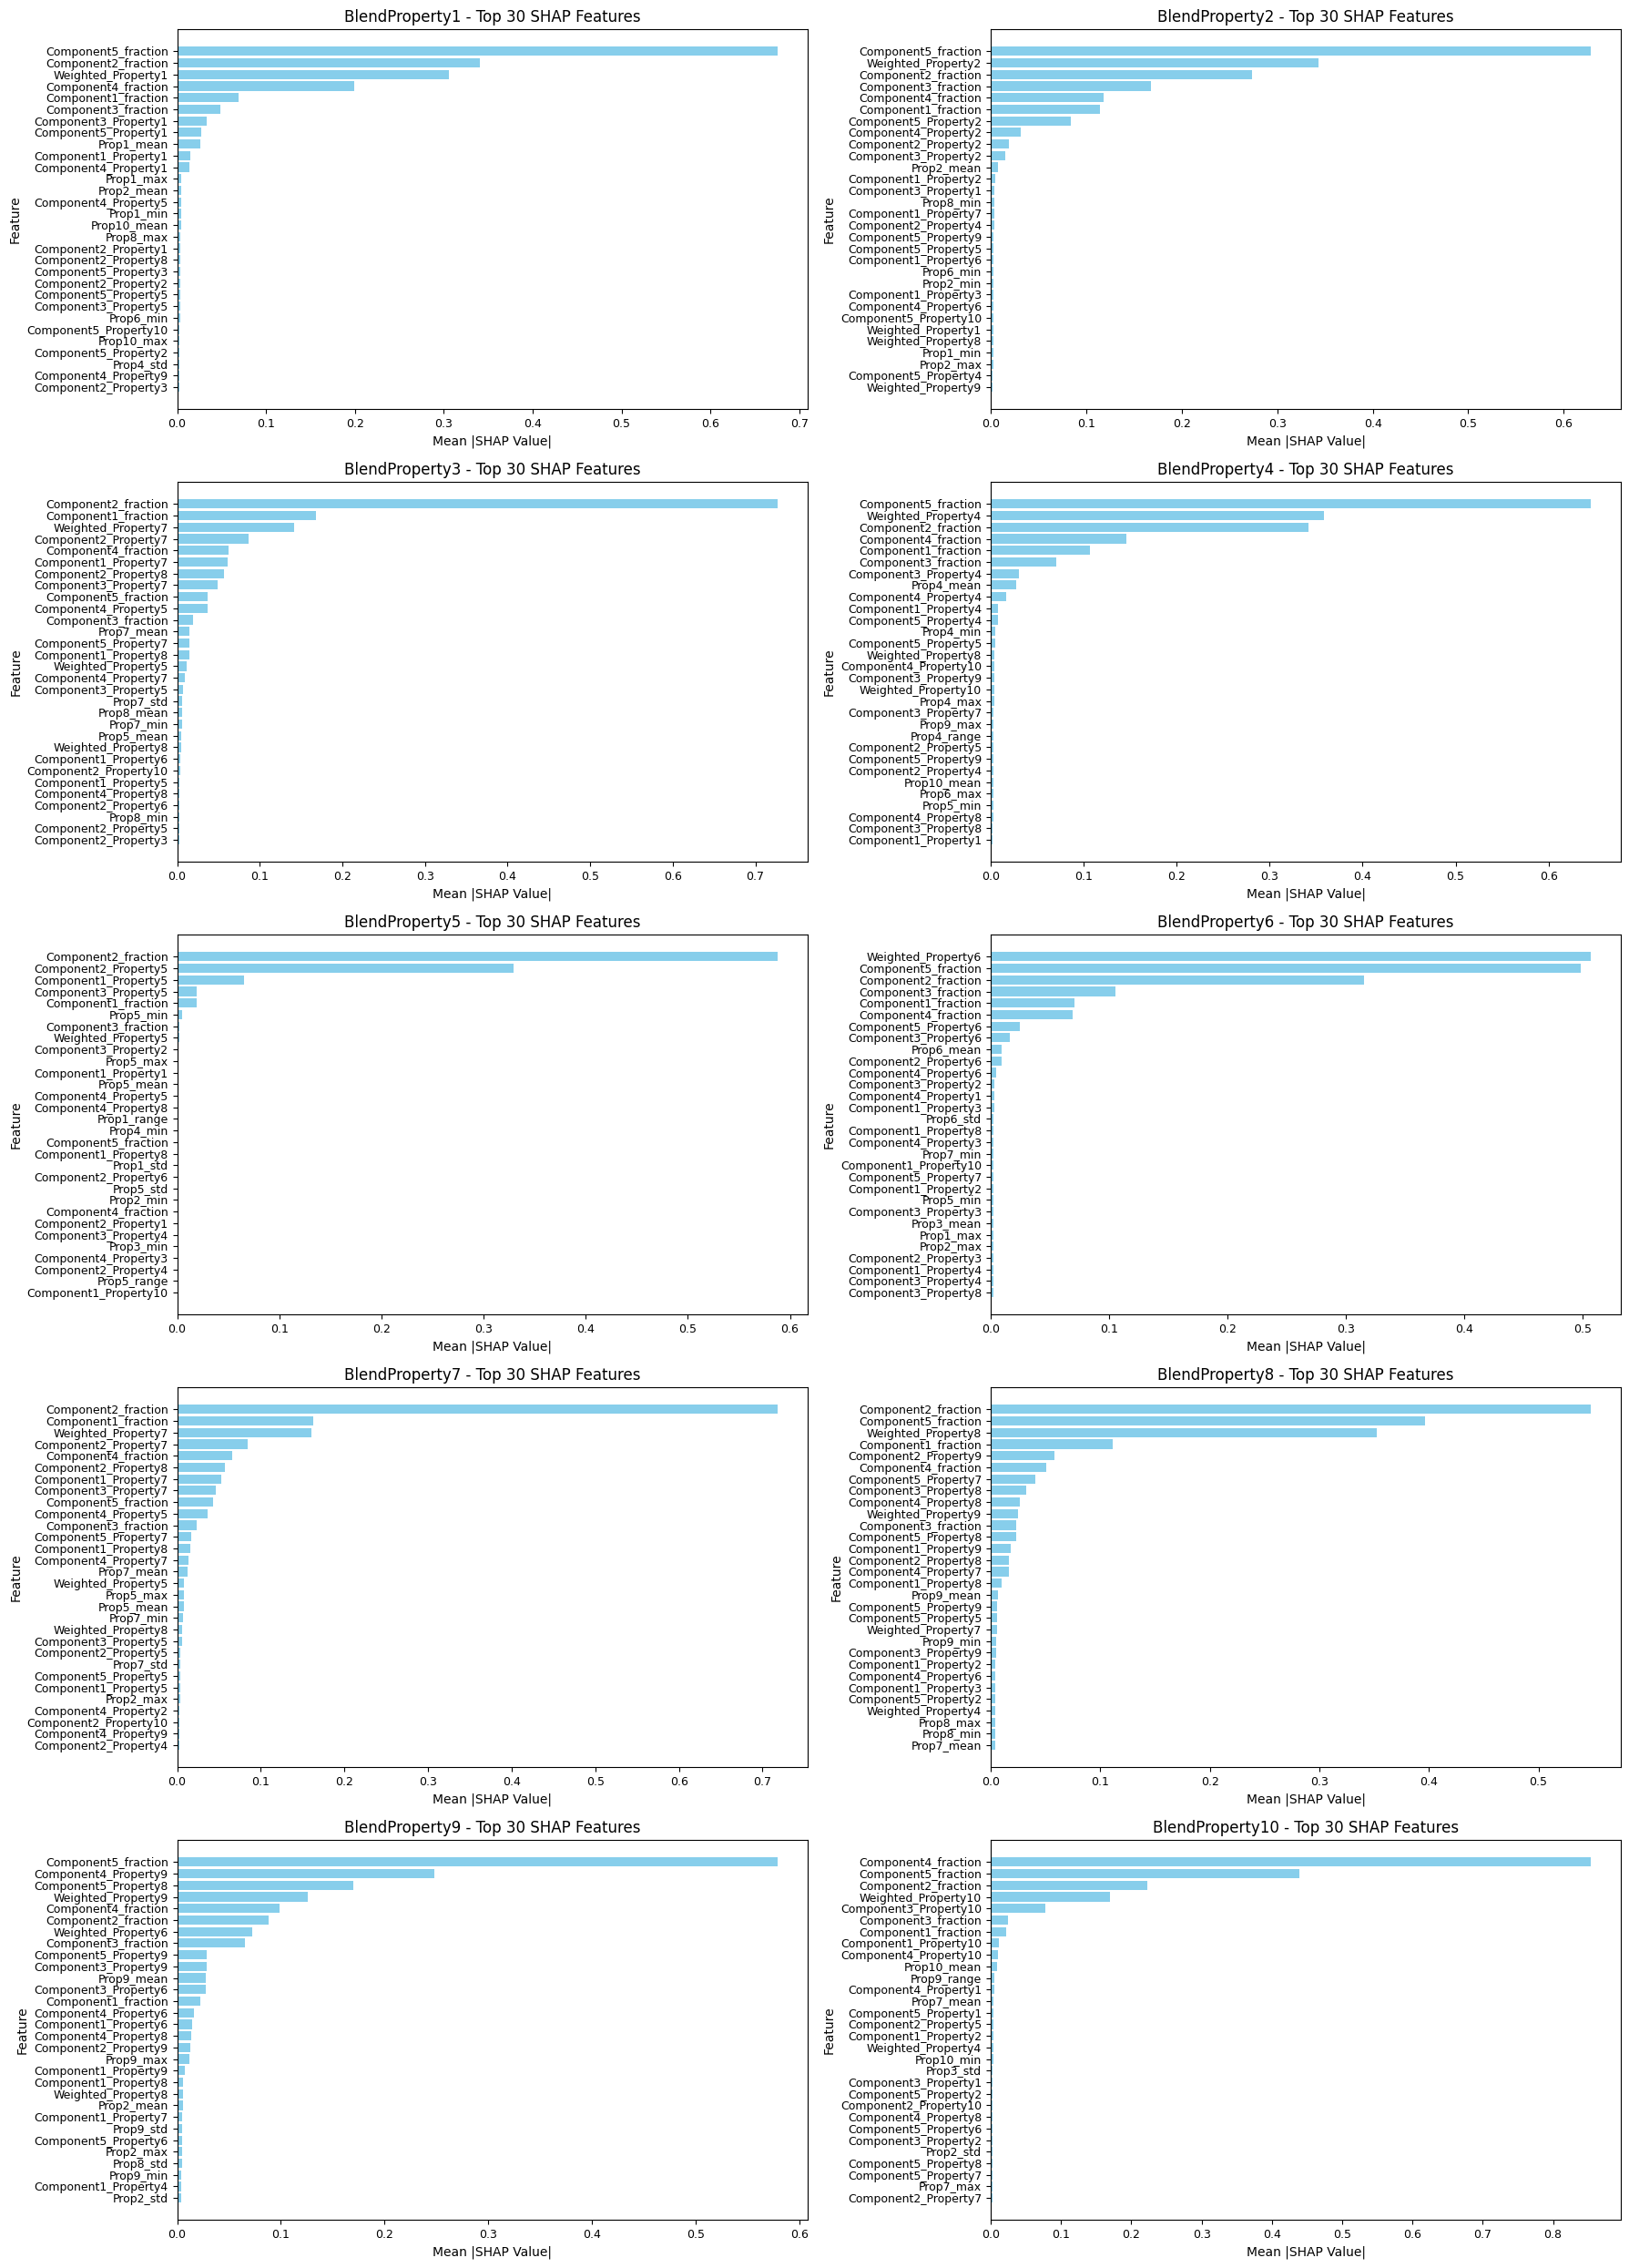

In [17]:
import matplotlib.pyplot as plt

# --- PLOT SHAP IMPORTANCE ---
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18, 25))
axes = axes.flatten()

for idx, target in enumerate(blend_cols):
    ax = axes[idx]
    shap_df = shap_importance_dict[target].sort_values(by="shap_importance", ascending=True)

    ax.barh(shap_df.index, shap_df['shap_importance'], color="skyblue")
    ax.set_title(f"{target} - Top {top_n} SHAP Features", fontsize=12)
    ax.set_xlabel("Mean |SHAP Value|", fontsize=10)
    ax.set_ylabel("Feature", fontsize=10)
    ax.tick_params(labelsize=9)

plt.tight_layout()
plt.show()